In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import numpy as np

In [4]:
d=pd.read_csv('/content/gdrive/My Drive/dataset/datasetikan.csv')
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Bandeng  36 non-null     float64
 1   Tongkol  36 non-null     float64
 2   Pari     36 non-null     float64
dtypes: float64(3)
memory usage: 992.0 bytes


In [5]:
xt=d.reset_index()['Bandeng']
print(xt)
print(len(xt))
print(xt.shape)

0     10111.08
1     10007.91
2      9814.53
3      9464.68
4      9462.05
5      9515.51
6      9519.35
7      9530.00
8      9594.39
9      9659.17
10     9742.16
11     9838.26
12    10032.66
13    10080.80
14    10082.43
15    10018.19
16     9826.63
17     9918.95
18     9931.71
19     9962.65
20     9871.12
21     9812.90
22     9714.50
23     9787.86
24     9780.19
25     9772.10
26     9606.97
27     9549.76
28     9627.08
29     9537.16
30     9401.61
31     9499.36
32     9455.56
33     9449.47
34     9539.29
35     9672.54
Name: Bandeng, dtype: float64
36
(36,)


In [ ]:
print(np.array(xt).reshape(-1, 1))

[[10111.08]
 [10007.91]
 [ 9814.53]
 [ 9464.68]
 [ 9462.05]
 [ 9515.51]
 [ 9519.35]
 [ 9530.  ]
 [ 9594.39]
 [ 9659.17]
 [ 9742.16]
 [ 9838.26]
 [10032.66]
 [10080.8 ]
 [10082.43]
 [10018.19]
 [ 9826.63]
 [ 9918.95]
 [ 9931.71]
 [ 9962.65]
 [ 9871.12]
 [ 9812.9 ]
 [ 9714.5 ]
 [ 9787.86]
 [ 9780.19]
 [ 9772.1 ]
 [ 9606.97]
 [ 9549.76]
 [ 9627.08]
 [ 9537.16]
 [ 9401.61]
 [ 9499.36]
 [ 9455.56]
 [ 9449.47]
 [ 9539.29]
 [ 9672.54]]


In [ ]:
df=np.array(xt).reshape(-1, 1)
print(df.shape)

(36, 1)


In [ ]:
training_size=int(len(df)*0.8)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:], df[training_size:,:1]

In [ ]:
train_data, test_data

(array([[10111.08],
        [10007.91],
        [ 9814.53],
        [ 9464.68],
        [ 9462.05],
        [ 9515.51],
        [ 9519.35],
        [ 9530.  ],
        [ 9594.39],
        [ 9659.17],
        [ 9742.16],
        [ 9838.26],
        [10032.66],
        [10080.8 ],
        [10082.43],
        [10018.19],
        [ 9826.63],
        [ 9918.95],
        [ 9931.71],
        [ 9962.65],
        [ 9871.12],
        [ 9812.9 ],
        [ 9714.5 ],
        [ 9787.86],
        [ 9780.19],
        [ 9772.1 ],
        [ 9606.97],
        [ 9549.76]]), array([[9627.08],
        [9537.16],
        [9401.61],
        [9499.36],
        [9455.56],
        [9449.47],
        [9539.29],
        [9672.54]]))

In [ ]:
print(train_data.shape)
print(test_data.shape)

(28, 1)
(8, 1)


In [ ]:
training_size, test_size

(28, 8)

In [ ]:
import numpy
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i+time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
time_step = 4
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [ ]:
x_test, y_test

(array([[9627.08, 9537.16, 9401.61, 9499.36],
        [9537.16, 9401.61, 9499.36, 9455.56],
        [9401.61, 9499.36, 9455.56, 9449.47]]),
 array([9455.56, 9449.47, 9539.29]))

In [ ]:
x_train, y_train
print(x_train)

[[10111.08 10007.91  9814.53  9464.68]
 [10007.91  9814.53  9464.68  9462.05]
 [ 9814.53  9464.68  9462.05  9515.51]
 [ 9464.68  9462.05  9515.51  9519.35]
 [ 9462.05  9515.51  9519.35  9530.  ]
 [ 9515.51  9519.35  9530.    9594.39]
 [ 9519.35  9530.    9594.39  9659.17]
 [ 9530.    9594.39  9659.17  9742.16]
 [ 9594.39  9659.17  9742.16  9838.26]
 [ 9659.17  9742.16  9838.26 10032.66]
 [ 9742.16  9838.26 10032.66 10080.8 ]
 [ 9838.26 10032.66 10080.8  10082.43]
 [10032.66 10080.8  10082.43 10018.19]
 [10080.8  10082.43 10018.19  9826.63]
 [10082.43 10018.19  9826.63  9918.95]
 [10018.19  9826.63  9918.95  9931.71]
 [ 9826.63  9918.95  9931.71  9962.65]
 [ 9918.95  9931.71  9962.65  9871.12]
 [ 9931.71  9962.65  9871.12  9812.9 ]
 [ 9962.65  9871.12  9812.9   9714.5 ]
 [ 9871.12  9812.9   9714.5   9787.86]
 [ 9812.9   9714.5   9787.86  9780.19]
 [ 9714.5   9787.86  9780.19  9772.1 ]]


In [ ]:
from IPython.core import history
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

batch_size = 10
num_epochs = 100

model=Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(4, 1)))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))

model.compile(loss='mean_absolute_error', optimizer='adam')
#model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9), metrics=["mean_absolute_error"])
history=model.fit(x_train, y_train, epochs=num_epochs, validation_data=(x_test, y_test))

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 9839.5088 - val_loss: 9516.9707
Epoch 2/100
1/1 [==============================] - 0s 49ms/step - loss: 9822.2910 - val_loss: 9499.3682
Epoch 3/100
1/1 [==============================] - 0s 33ms/step - loss: 9803.7783 - val_loss: 9490.4980
Epoch 4/100
1/1 [==============================] - 0s 53ms/step - loss: 9794.5996 - val_loss: 9480.3701
Epoch 5/100
1/1 [==============================] - 0s 34ms/step - loss: 9783.9521 - val_loss: 9467.4365
Epoch 6/100
1/1 [==============================] - 0s 32ms/step - loss: 9771.4141 - val_loss: 9459.9570
Epoch 7/100
1/1 [==============================] - 0s 33ms/step - loss: 9766.5391 - val_loss: 9445.4014
Epoch 8/100
1/1 [==============================] - 0s 31ms/step - loss: 9756.3779 - val_loss: 9439.9971
Epoch 9/100
1/1 [==============================] - 0s 35ms/step - loss: 9742.4072 - val_loss: 9431.4824
Epoch 10/100
1/1 [==============================] - 0s 36ms/step -

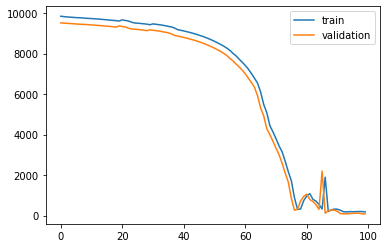

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()

In [ ]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

from sklearn.metrics import mean_absolute_error
mae_train=mean_squared_error(y_train, train_predict)
print(mae_train)

mae_test=mean_squared_error(y_test, test_predict)
print(mae_test)

mae=mean_absolute_error(y_test, test_predict)
print(mae)

1/1 [==============================] - 0s 19ms/step
55987.1365704176
11570.91166850851
84.55722656250025


In [ ]:
xts=[[9824.23, 9826.88, 9786.63, 9576.75]]
prediksi=model.predict(xts)
print(prediksi)

1/1 [==============================] - 0s 28ms/step
[[9737.819]]


In [ ]:
xts2=[[9826.88, 9786.63, 9576.75, 9512.63]]
prediksi2=model.predict(xts2)
print(prediksi2)

1/1 [==============================] - 0s 28ms/step
[[9706.08]]


In [ ]:
data=[[9827, 9787, 9577, 9513]]
predik=model.predict(data)
print(predik)

1/1 [==============================] - 0s 341ms/step
[[9706.286]]
